# IRIS DATASET

Link:
    
https://archive.ics.uci.edu/ml/datasets/Iris
    
Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.

This is an exceedingly simple domain.

Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

Objective:
    
Exploratory Analysis 

Multiclass Classification: Logistic Regression to predict Iris class from given inputs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# Load dataset

# Load the data 
iris=pd.read_csv("C://Users//rashi//OneDrive//Desktop//USC//Python//ML_tutorial//iris_data.csv",header=0, names=['sepal_len','sepal_width','petal_len','petal_width','class'])
print(iris)

iris.columns

     sepal_len  sepal_width  petal_len  petal_width           class
0          4.9          3.0        1.4          0.2     Iris-setosa
1          4.7          3.2        1.3          0.2     Iris-setosa
2          4.6          3.1        1.5          0.2     Iris-setosa
3          5.0          3.6        1.4          0.2     Iris-setosa
4          5.4          3.9        1.7          0.4     Iris-setosa
..         ...          ...        ...          ...             ...
144        6.7          3.0        5.2          2.3  Iris-virginica
145        6.3          2.5        5.0          1.9  Iris-virginica
146        6.5          3.0        5.2          2.0  Iris-virginica
147        6.2          3.4        5.4          2.3  Iris-virginica
148        5.9          3.0        5.1          1.8  Iris-virginica

[149 rows x 5 columns]


Index(['sepal_len', 'sepal_width', 'petal_len', 'petal_width', 'class'], dtype='object')

Text(0, 0.5, 'Petal Width(cm)')

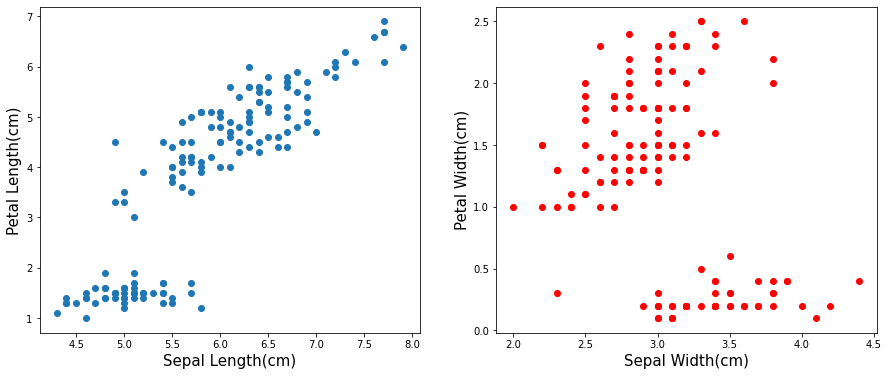

In [3]:
# Plots 

fig,ax=plt.subplots(1,2,figsize=(15,6))


ax[0].scatter(iris.sepal_len,iris.petal_len)
ax[1].scatter(iris.sepal_width,iris.petal_width,color='r')

ax[0].set_xlabel('Sepal Length(cm)',fontsize=15)
ax[0].set_ylabel('Petal Length(cm)',fontsize=15)
ax[1].set_xlabel('Sepal Width(cm)',fontsize=15)
ax[1].set_ylabel('Petal Width(cm)',fontsize=15)

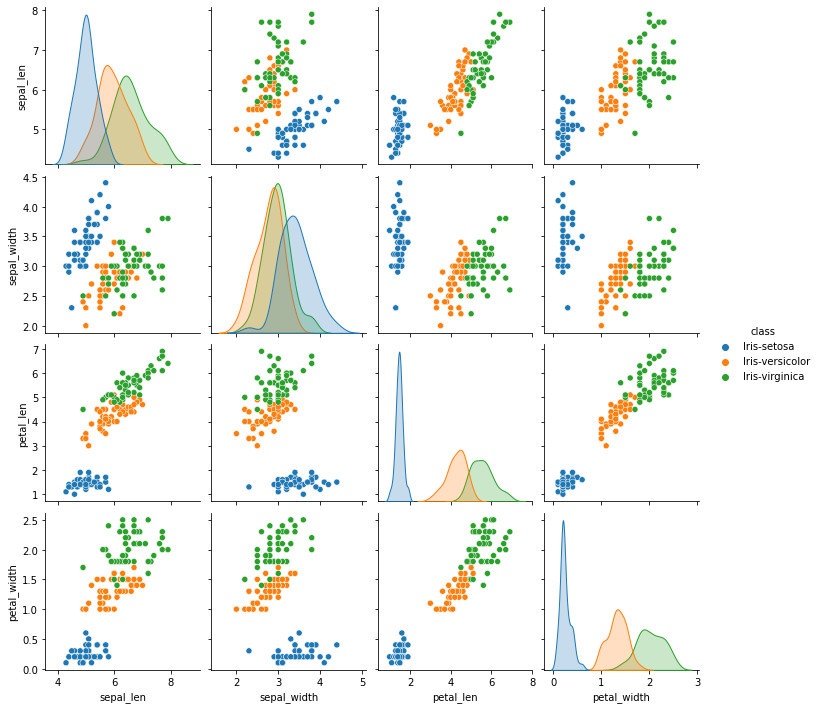

In [4]:
# PAIRPLOT
# helps to decide which ML classifier to go for based on overlpping of the target labels

import seaborn as sn

sn.pairplot(iris,hue='class')

In [3]:
X=iris[['sepal_len', 'sepal_width', 'petal_len', 'petal_width']]
y=iris['class']

# test and train data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=1)

X_test

,sepal_len,sepal_width,petal_len,petal_width
145,6.3,2.5,5.0,1.9
89,5.5,2.6,4.4,1.2
54,5.7,2.8,4.5,1.3
77,6.0,2.9,4.5,1.5
84,6.0,3.4,4.5,1.6
105,4.9,2.5,4.5,1.7
91,5.8,2.6,4.0,1.2
53,6.5,2.8,4.6,1.5
44,4.8,3.0,1.4,0.3
59,5.0,2.0,3.5,1.0


In [5]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# train model
model.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [21]:
# prediction 
y_pred=model.predict(X_test)

# score
score=model.score(X_test,y_test)
print("The score of the model is:",round(score*100,2),"%")

# y_pred


The score of the model is: 96.67 %


In [25]:
# Evaluation metrics

# Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

cm=confusion_matrix(y_test,y_pred)
print(cm)


[[10  0  0]
 [ 0 13  0]
 [ 0  1  6]]


<AxesSubplot:>

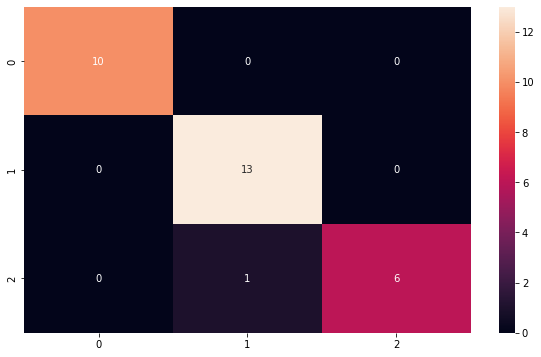

In [28]:
# heatmap of the matrix
import seaborn as sn

plt.figure(figsize=(10,6))
sn.heatmap(cm,annot=True,fmt='g')


In [13]:
# Classification Report 

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.86      0.92         7

       accuracy                           0.97        30
      macro avg       0.98      0.95      0.96        30
   weighted avg       0.97      0.97      0.97        30



# Using Decision Tree Approach

In [6]:
# Using Decision Tree

from sklearn import tree
model_dt=tree.DecisionTreeClassifier()

model_dt.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [14]:
# score of model
acc_dt=model_dt.score(X_test,y_test)
print(f"The score of the Decision Tree model is: {round(acc_dt*100,2)}%")

y_pred_dt=model_dt.predict(X_test)

The score of the Decision Tree model is: 96.67%


In [15]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

cm_dt=confusion_matrix(y_test,y_pred_dt)
print(cm_dt)

[[10  0  0]
 [ 0 13  0]
 [ 0  1  6]]


# Using Support Vector Machines(SVM)

Supervised Classification Algo

from sklearn.svm import SVC

Parameters C=Regularization, gamma, Kernel='linear','rbf','poly', degree=3 (default) for polynomial

model=SVC(C=1.0,gamma=1,kernel='rbf')


In [7]:
# SVM model

from sklearn.svm import SVC


#
model_svm=SVC(C=1.0,gamma=1,kernel='rbf')

# train model
model_svm.fit(X_train,y_train)

# predict
y_pred_svm=model_svm.predict(X_test)

#accuracy 
model_svm.score(X_test,y_test)

NameError: name 'X_train' is not defined

<AxesSubplot:>

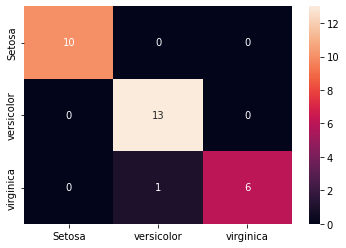

In [10]:
from sklearn.metrics import confusion_matrix

cm_svm=confusion_matrix(y_test,y_pred_svm)
cm_svm

# heatmap of cm_svm
import seaborn as sn

sn.heatmap(cm_svm,annot=True,xticklabels=['Setosa','versicolor','virginica'],yticklabels=['Setosa','versicolor','virginica'])

In [7]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_svm))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.86      0.92         7

       accuracy                           0.97        30
      macro avg       0.98      0.95      0.96        30
   weighted avg       0.97      0.97      0.97        30



# Random Forest Classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=10)

# train model
model_rf.fit(X_train,y_train)

# prediction
y_pred_rf=model_rf.predict(X_test)

# score
acc_rf=model_rf.score(X_test,y_test)
print(f"The score of the Random Forest Classifier is: {round(acc_rf*100,2)}%")

NameError: name 'X_train' is not defined

# K FOLD VALIDATION

It involves diviidng data into n no of folds and then itersting over each fold 

Each fold gives score and final model score is the avg of all scores


In [10]:
from sklearn.model_selection import StratifiedKFold
kf=StratifiedKFold(n_splits=3)

X=iris[['sepal_len', 'sepal_width', 'petal_len', 'petal_width']]
y=iris['class']


for train_index,test_index in kf.split(X,y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], \
                                      y[train_index], y[test_index]

KeyError: "None of [Int64Index([ 17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,\n             30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,\n             43,  44,  45,  46,  47,  48,  65,  66,  67,  68,  69,  70,  71,\n             72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,\n             85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,\n             98, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,\n            128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,\n            141, 142, 143, 144, 145, 146, 147, 148],\n           dtype='int64')] are in the [columns]"

# Cross Validation score (Shortcut to use K Fold)

FORMAT:
    
cross_val_score(model(),X,y,cv=n)

where model:svm,LR,RF,DT etc
      cv=n (no of kfolds or splits in data)

In [11]:
from sklearn.model_selection import cross_val_score

score_svm_kf=cross_val_score(SVC(),X,y)
score_svm_kf

print(f"The mean score of Support Vector Machines by KFOLD is: {score_svm_kf.mean()*100}%")

The mean score of Support Vector Machines by KFOLD is: 96.66666666666666%


In [12]:
score_rf_kf=cross_val_score(RandomForestClassifier(),X,y)
score_rf_kf

print(f"The mean score of Random Forest by KFOLD is: {score_rf_kf.mean()*100}%")

The mean score of Random Forest by KFOLD is: 96.0%


In [13]:
score_dt_kf=cross_val_score(tree.DecisionTreeClassifier(),X,y)
score_dt_kf

print(f"The mean score of Decision Tree by KFOLD is: {score_dt_kf.mean()*100}%")

The mean score of Decision Tree by KFOLD is: 96.00000000000001%


In [14]:
score_lr_kf = cross_val_score(LogisticRegression(),X,y)
score_lr_kf

print(f"The mean score of Logistic Regression by KFOLD is: {score_lr_kf.mean()*100}%")

The mean score of Logistic Regression by KFOLD is: 97.33333333333334%


C:\Users\rashi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rashi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

# K Means Clustering: Unsupervised Learning Algo

In [4]:
# ONLY USING Petal length and sepal length

iris2=iris[['sepal_len','petal_len']]
iris2

,sepal_len,petal_len
0,4.9,1.4
1,4.7,1.3
2,4.6,1.5
3,5.0,1.4
4,5.4,1.7
...,...,...
144,6.7,5.2
145,6.3,5.0
146,6.5,5.2
147,6.2,5.4


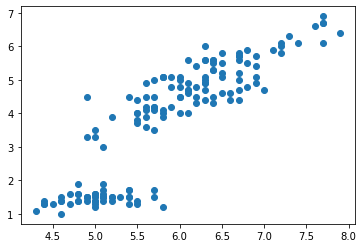

In [6]:
# plot 
plt.scatter(iris2.sepal_len,iris2.petal_len)

In [6]:
# KMeans Clustering

from sklearn.cluster import KMeans

km=KMeans(n_clusters=3)

# fit 
km.fit(iris2)

# predict
y_pred_km=km.predict(iris2)
y_pred_km



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

C:\Users\rashi\AppData\Local\Temp/ipykernel_18196/4221995047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris2['result']=y_pred_km


Text(0, 0.5, 'Petal Length(cm)')

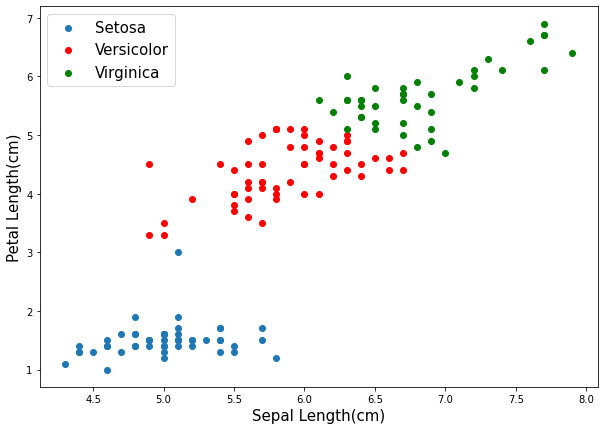

In [34]:
iris2['result']=y_pred_km
iris2

# plot the KM clustering result

plt.figure(figsize=(10,7))

plt.scatter(iris2.sepal_len[iris2.result==0],iris2.petal_len[iris2.result==0],label='Setosa')
plt.scatter(iris2.sepal_len[iris2.result==1],iris2.petal_len[iris2.result==1],color='r',label='Versicolor')
plt.scatter(iris2.sepal_len[iris2.result==2],iris2.petal_len[iris2.result==2],color='g',label='Virginica')
plt.legend(fontsize=15)

plt.xlabel('Sepal Length(cm)',fontsize=15)
plt.ylabel('Petal Length(cm)',fontsize=15)

C:\Users\rashi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[559.8751677852349, 112.91353577044023, 53.78365315391085, 34.301224860853424, 25.618268591197157, 21.778647842897847, 18.259535529349723, 15.027559859680558, 13.39955586080586, 11.832409523809522]


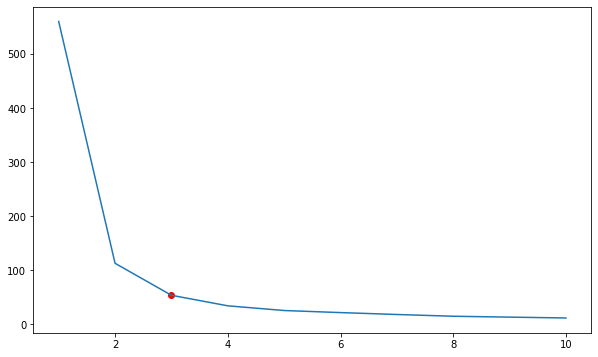

In [7]:
# ELBOW TECHNIQUE TO FIND BEST K VALUE (VALUE CORREPODING TO ELBOW IN THE PLOT(K VS SSE) IS THE BEST K VALUE

sse=[]
k=range(1,11)
for i in range(1,11):
    km_t=KMeans(n_clusters=i)
    km_t.fit(iris2[['sepal_len','petal_len']])
    sse_temp=km_t.inertia_
    sse.append(sse_temp)

print(sse)

# plot elbow 
plt.figure(figsize=(10,6))
plt.plot(k,sse)

# Best k value at the elbow (i.e. k=3 here)
plt.scatter(3,sse[2],color='r',marker='o')

# K Nearest Neighbors

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train,y_train)

# score
acc_knn=knn.score(X_test,y_test)
print(f"The score of KNN is: {acc_knn*100}%")

The score of KNN is: 96.66666666666667%


In [23]:
#Using GridSearchCV 

from sklearn import neighbors 
from sklearn.model_selection import GridSearchCV

clf=GridSearchCV(neighbors.KNeighborsClassifier(),{'n_neighbors':[1,2,3,4,5,6,7,8,9]})

clf.fit(X_train,y_train)

clf.cv_results_

clf.best_params_

clf.best_score_

0.9663043478260871